In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# 뉴스기사 다중분류 개요
## 로이터 뉴스를 46개의 상호 배타적 토픽으로 다중분류

In [2]:
#데이터 다운로드
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
#index로 0~45 사이의 정수
print(train_labels[0])

3


In [5]:
# 데이터의 벡터 변환
# 넘파이 필요
def vectorize_sequences(seqs,dim = 10000):
    results = np.zeros((len(seqs), dim))
    for i, seq in enumerate(seqs):
        results[i,seq] =1. #  특정 인덱스 위치를 1.으로 만듬
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
# 레이블을 벡터로 변환 , one-hot encoding이 범주형 데이터에 널리 사용

def to_one_hot(labels, dim = 46):
    results = np.zeros((len(labels), dim))
    for i, l in enumerate(labels):
        results[i,l]=1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [7]:
# 레이블 벡터 변환시 케라스의 to_categorical 함수도 사용 가능
'''
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

'''

'\none_hot_train_labels = to_categorical(train_labels)\none_hot_test_labels = to_categorical(test_labels)\n\n'

In [32]:
# 모델 구성

from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
# 마지막 Dense층의 크기가 46 → 각 입력 샘플에 대해 46차원의 벡터를 출력. 
# 이 벡터의 각 원소는 각기 다른 출력 클래스가 인코딩 된 것

# 마지막 층에 softmax 활성화 함수 사용 → 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력.
# 46차원 출력벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률. 
# 46개 값을 모두 더하면 1이 됨

In [33]:
# 이런 문제에 사용할 최선의 손실 함수는 categorical_crossentropy
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [34]:
#훈련 검증
# 훈련 데이터에서 1000개의 샘플을 따로 떼어 검증 세트로 사용

x_val = x_train[:1000]
parital_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [35]:
# 20번의 에포크로 모델 훈련
history = model.fit(parital_x_train, partial_y_train, epochs = 20, batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 24ms/step - loss: 2.6383 - accuracy: 0.5466 - val_loss: 1.7733 - val_accuracy: 0.6610
Epoch 2/20
16/16 [==============================] - 0s 16ms/step - loss: 1.4431 - accuracy: 0.7020 - val_loss: 1.3098 - val_accuracy: 0.7030
Epoch 3/20
16/16 [==============================] - 0s 16ms/step - loss: 1.0734 - accuracy: 0.7646 - val_loss: 1.1428 - val_accuracy: 0.7410
Epoch 4/20
16/16 [==============================] - 0s 16ms/step - loss: 0.8562 - accuracy: 0.8107 - val_loss: 1.0317 - val_accuracy: 0.7750
Epoch 5/20
16/16 [==============================] - 0s 16ms/step - loss: 0.6939 - accuracy: 0.8539 - val_loss: 0.9780 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 0s 15ms/step - loss: 0.5576 - accuracy: 0.8862 - val_loss: 0.9467 - val_accuracy: 0.7920
Epoch 7/20
16/16 [==============================] - 0s 16ms/step - loss: 0.4550 - accuracy: 0.9070 - val_loss: 0.9333 - val_accuracy: 0.7940
Epoch 8/20
16

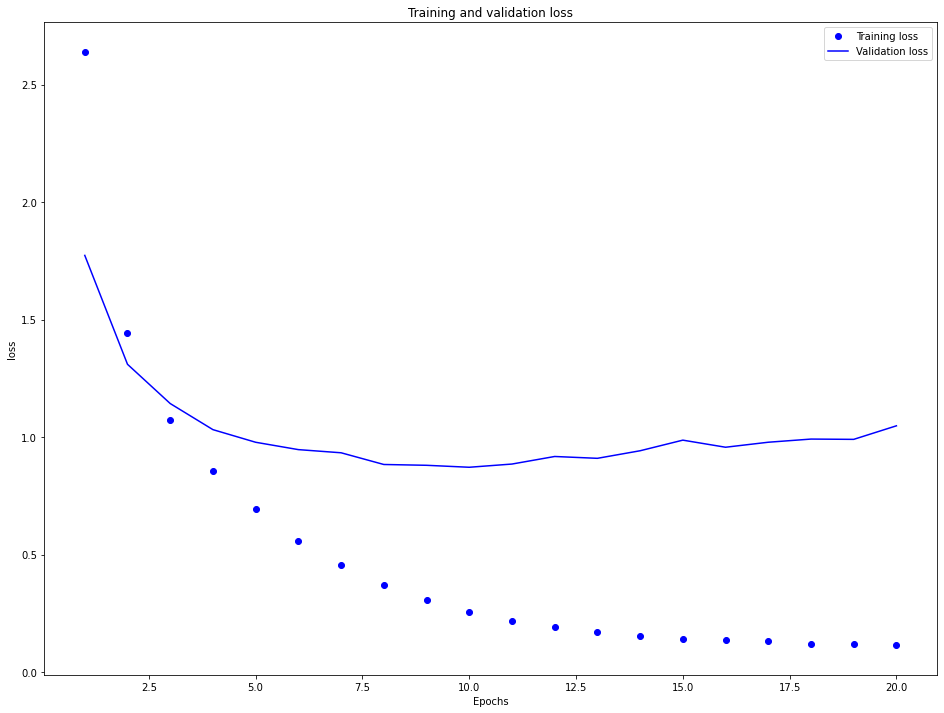

In [36]:
# 손실과 정확도 곡선 그림

import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.figure(figsize = (16,12))
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

<Figure size 432x288 with 0 Axes>

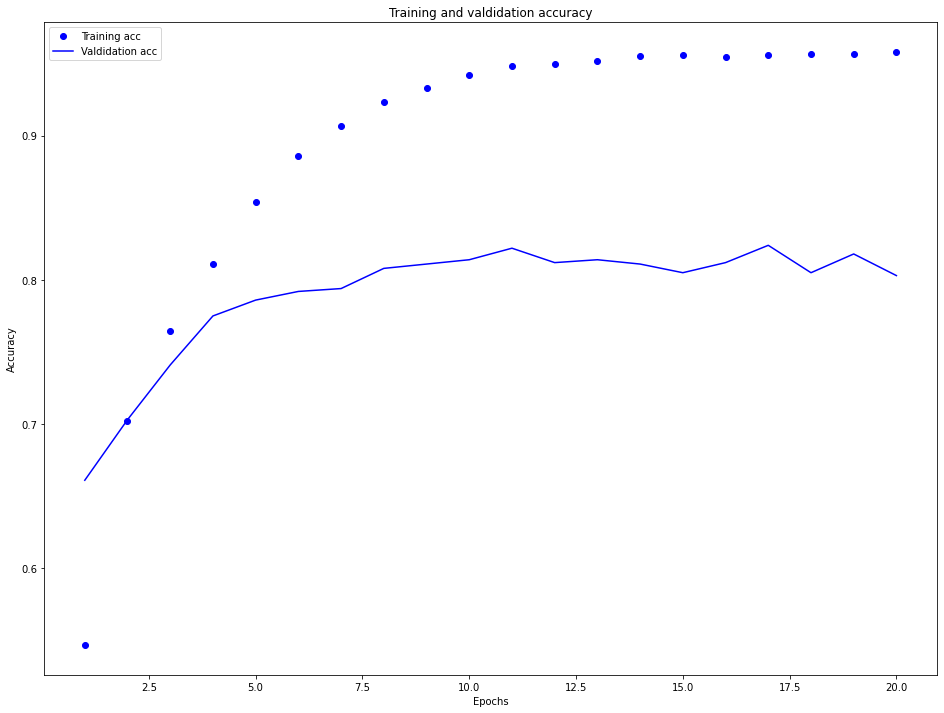

In [37]:
plt.clf()  # plt.clf ?
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.figure(figsize = (16,12))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Valdidation acc')
plt.title('Training and valdidation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
# 9번째 에포크에서 과대적합 시작 -> 9번의 에포크로 새로운 모델 훈련

model = models.Sequential()

#은닉층 구간
model.add(layers.Dense(64, activation ='relu', input_shape =(10000,))) # input shape?
model.add(layers.Dense(64, activation='relu'))
#은닉층

model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(parital_x_train, partial_y_train, epochs = 9, batch_size = 512)
results = model.evaluate(x_test, one_hot_test_labels)
print(results)




Epoch 1/9
16/16 [==============================] - 0s 14ms/step - loss: 2.5926 - accuracy: 0.4892
Epoch 2/9
16/16 [==============================] - 0s 14ms/step - loss: 1.3950 - accuracy: 0.7022
Epoch 3/9
16/16 [==============================] - 0s 14ms/step - loss: 1.0569 - accuracy: 0.7722
Epoch 4/9
16/16 [==============================] - 0s 14ms/step - loss: 0.8476 - accuracy: 0.8186
Epoch 5/9
16/16 [==============================] - 0s 14ms/step - loss: 0.6755 - accuracy: 0.8567
Epoch 6/9
16/16 [==============================] - 0s 14ms/step - loss: 0.5374 - accuracy: 0.8817
Epoch 7/9
16/16 [==============================] - 0s 14ms/step - loss: 0.4357 - accuracy: 0.9044
Epoch 8/9
16/16 [==============================] - 0s 14ms/step - loss: 0.3525 - accuracy: 0.9241
Epoch 9/9
71/71 [==============================] - 0s 1ms/step - loss: 0.9812 - accuracy: 0.7818
[0.9811697602272034, 0.7818343639373779]


In [45]:
# 새로우데이터 예측
predictions  = model.predict(x_test)

In [46]:
predictions[0].shape

(46,)

In [47]:
np.sum(predictions[0])


0.99999976

In [48]:
np.argmax(predictions[0])

3